In [1]:
from LRL import *

In [2]:
USE_CUDA

True

# Cartpole task

In [3]:
env = gym.make('CartPole-v0')

In [4]:
class CartpoleNN(nn.Module):
    def __init__(self, linear):
        super().__init__()
        
        self.layers = nn.Sequential(
                        linear(4, 128),
                        nn.ReLU(),
                        linear(128, 128),
                        nn.ReLU())
        
    def forward(self, x):
        return self.layers(x)

# Store experiment results

In [5]:
import time
import pandas as pd
results = pd.DataFrame(columns=["Reached 200", "Average reward", "FPS"])

In [6]:
def store_res(name, agent):
    perfect = np.nonzero(np.array(agent.logger["rewards"]) == 200)[0]
    
    results.loc[name] = [perfect[0] if len(perfect) > 0 else None,
                         np.array(agent.logger["rewards"]).mean(),
                         np.median(agent.logger["fps"])]

## Classic DQN

In [7]:
config = {
    "env": env,
    "Qnetwork_FeatureExtractor": CartpoleNN,
    "QnetworkHead": Qnetwork,
    "target_update": 100,
    "batch_size": 32,
    "gamma": 0.99,
    "replay_buffer_init": 128,
    "replay_buffer_capacity": 1000,
    "epsilon_start": 1, "epsilon_final": 0.01, "epsilon_decay": 500
}

In [8]:
agent = eGreedy(TargetQAgent(QAgent(ReplayBufferAgent)))(config)

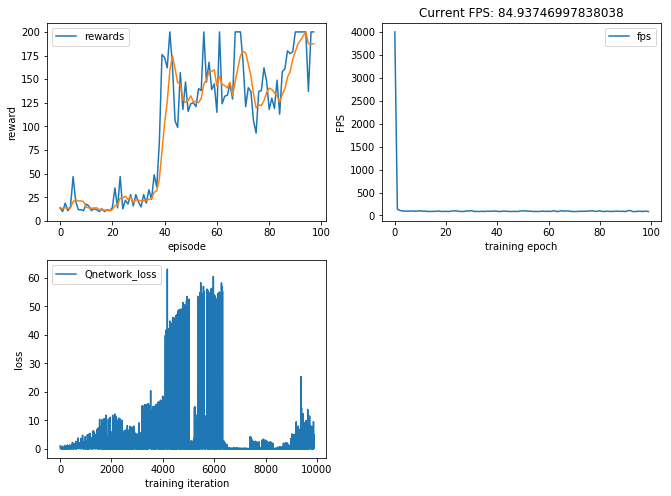

In [9]:
for i in range(100):
    agent.learn(100)
    plot_durations(agent, 5)    

plt.show()

In [10]:
store_res("DQN", agent)

## Twin DQN

In [11]:
config = {
    "env": env,
    "Qnetwork_FeatureExtractor": CartpoleNN,
    "QnetworkHead": Qnetwork,
    "batch_size": 32,
    "gamma": 0.99,
    "replay_buffer_init": 128,
    "replay_buffer_capacity": 1000,
    "epsilon_start": 1, "epsilon_final": 0.01, "epsilon_decay": 500
}

In [12]:
agent = eGreedy(TwinQAgent(QAgent(ReplayBufferAgent)))(config)

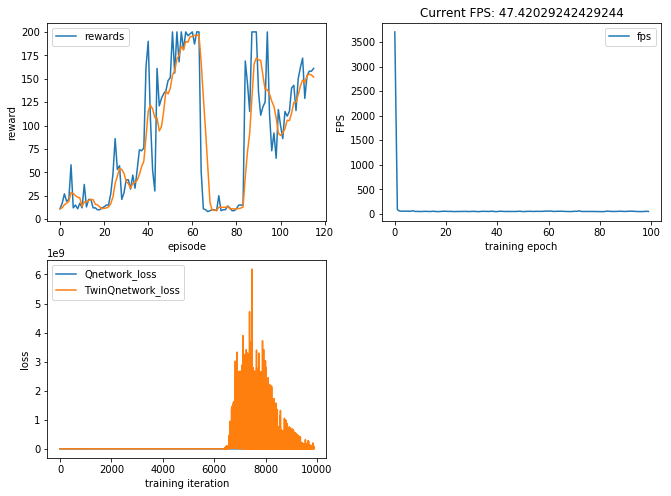

In [13]:
for i in range(100):
    agent.learn(100)
    plot_durations(agent, 5)    

plt.show()

In [14]:
store_res("TwinDQN", agent)

## Backwards DQN

In [15]:
config = {
    "env": env,
    "Qnetwork_FeatureExtractor": CartpoleNN,
    "QnetworkHead": Qnetwork,
    "batch_size": 32,
    "gamma": 0.99,
    "replay_buffer_init": 128,
    "replay_buffer_games_capacity": 50,
    "epsilon_start": 1, "epsilon_final": 0.01, "epsilon_decay": 500
}

In [16]:
agent = eGreedy(QAgent(BackwardBufferAgent))(config)

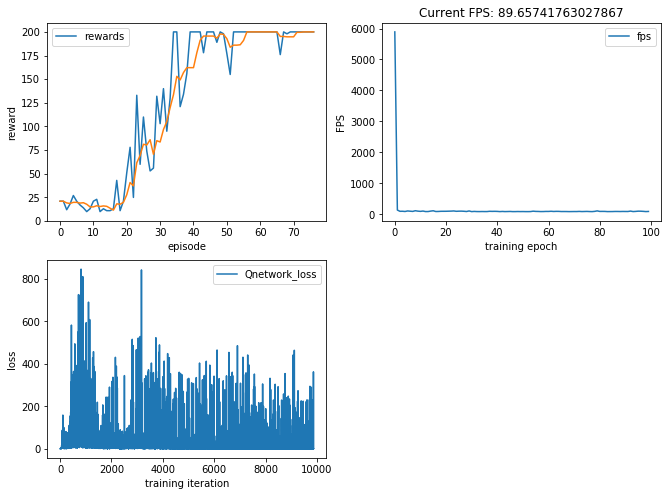

In [17]:
for i in range(100):
    agent.learn(100)
    plot_durations(agent, 5)    

plt.show()

In [18]:
store_res("Backwards DQN", agent)

## Double DQN

In [19]:
config = {
    "env": env,
    "Qnetwork_FeatureExtractor": CartpoleNN,
    "QnetworkHead": Qnetwork,
    "target_update": 100,
    "batch_size": 32,
    "gamma": 0.99,
    "replay_buffer_init": 128,
    "replay_buffer_capacity": 1000,
    "epsilon_start": 1, "epsilon_final": 0.01, "epsilon_decay": 500
}

In [20]:
agent = eGreedy(DoubleQAgent(QAgent(ReplayBufferAgent)))(config)

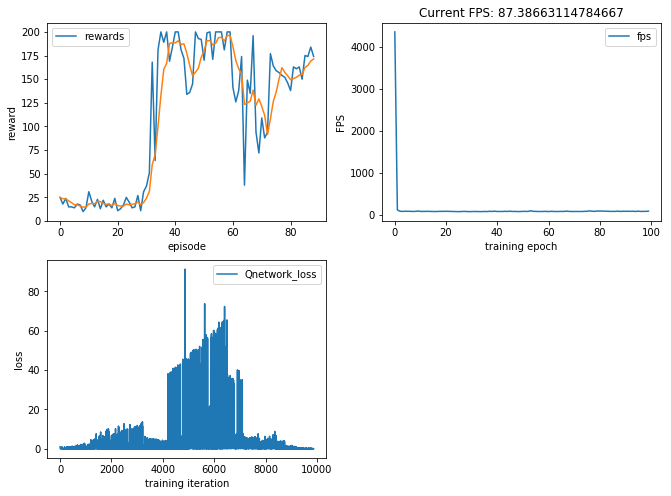

In [21]:
for i in range(100):
    agent.learn(100)
    plot_durations(agent, 5)    

plt.show()

In [22]:
store_res("Double DQN", agent)

## Dueling Double DQN

In [23]:
config = {
    "env": env,
    "Qnetwork_FeatureExtractor": CartpoleNN,
    "QnetworkHead": DuelingQnetwork,
    "target_update": 100,
    "batch_size": 32,
    "gamma": 0.99,
    "replay_buffer_init": 128,
    "replay_buffer_capacity": 1000,
    "epsilon_start": 1, "epsilon_final": 0.01, "epsilon_decay": 500
}

In [24]:
agent = eGreedy(DoubleQAgent(QAgent(ReplayBufferAgent)))(config)

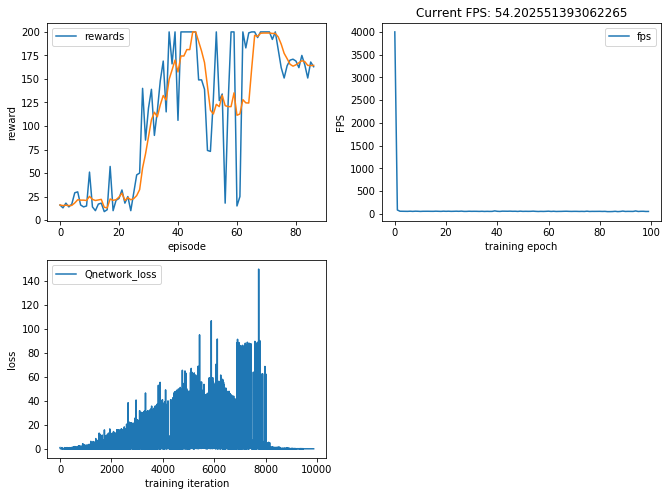

In [25]:
for i in range(100):
    agent.learn(100)
    plot_durations(agent, 5)    

plt.show()

In [26]:
store_res("Dueling Double DQN", agent)

## Double DQN + Prioritized

In [27]:
config = {
    "env": env,
    "Qnetwork_FeatureExtractor": CartpoleNN,
    "QnetworkHead": Qnetwork,
    "target_update": 100,
    "batch_size": 32,
    "gamma": 0.99,
    "replay_buffer_init": 128,
    "replay_buffer_capacity": 1000,
    "epsilon_start": 1, "epsilon_final": 0.01, "epsilon_decay": 500,
    "rp_alpha": 0.6, "rp_beta_start": 0.4, "rp_beta_frames": 100
}

In [28]:
agent = eGreedy(DoubleQAgent(QAgent(PrioritizedBufferAgent)))(config)

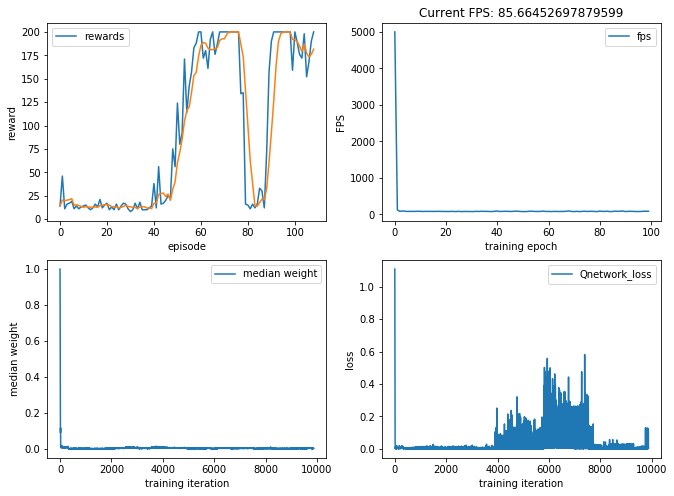

In [29]:
for i in range(100):
    agent.learn(100)
    plot_durations(agent, 5)    

plt.show()

In [30]:
store_res("Prioritized Double DQN", agent)

## Noisy Double DQN

In [31]:
config = {
    "env": env,
    "Qnetwork_FeatureExtractor": CartpoleNN,
    "QnetworkHead": Qnetwork,
    "Qnetwork_linear": NoisyLinear(),
    "target_update": 100,
    "batch_size": 32,
    "gamma": 0.99,
    "replay_buffer_init": 128,
    "replay_buffer_capacity": 1000
}

In [32]:
agent = DoubleQAgent(QAgent(ReplayBufferAgent))(config)

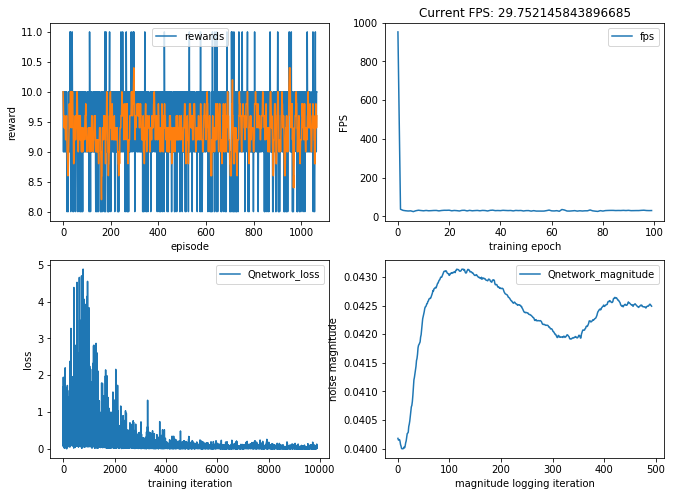

In [33]:
for i in range(100):
    agent.learn(100)
    plot_durations(agent, 5)    

plt.show()

In [34]:
store_res("Noisy Double DQN", agent)

## NoisyNet + Double DQN + Prioritized

In [35]:
config = {
    "env": env,
    "Qnetwork_FeatureExtractor": CartpoleNN,
    "QnetworkHead": Qnetwork,
    "Qnetwork_linear": NoisyLinear(),
    "target_update": 100,
    "batch_size": 32,
    "gamma": 0.99,
    "replay_buffer_init": 128,
    "replay_buffer_capacity": 1000,
    "rp_alpha": 0.6, "rp_beta_start": 0.4, "rp_beta_frames": 100
}

In [36]:
agent = DoubleQAgent(QAgent(PrioritizedBufferAgent))(config)

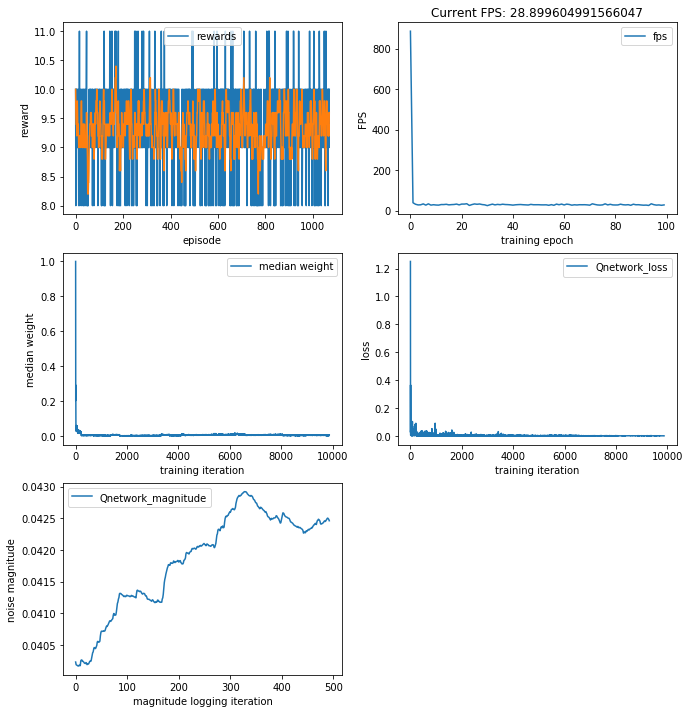

In [37]:
for i in range(100):
    agent.learn(100)
    plot_durations(agent, 5)    

plt.show()

In [38]:
store_res("Noisy Prioritized Double DQN", agent)

## Dueling + NoisyNet + Double DQN + Prioritized

In [39]:
config = {
    "env": env,
    "Qnetwork_FeatureExtractor": CartpoleNN,
    "QnetworkHead": DuelingQnetwork,
    "Qnetwork_linear": NoisyLinear(),
    "target_update": 100,
    "batch_size": 32,
    "gamma": 0.99,
    "replay_buffer_init": 128,
    "replay_buffer_capacity": 1000,
    "rp_alpha": 0.6, "rp_beta_start": 0.4, "rp_beta_frames": 100
}

In [40]:
agent = DoubleQAgent(QAgent(PrioritizedBufferAgent))(config)

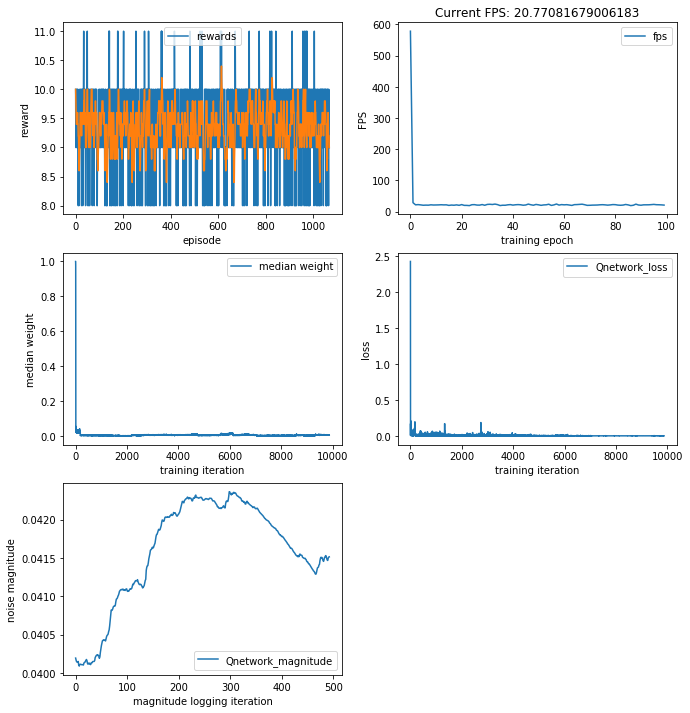

In [41]:
for i in range(100):
    agent.learn(100)
    plot_durations(agent, 5)    

plt.show()

In [42]:
store_res("Noisy Prioritized Dueling Double DQN", agent)

# Categorical

In [43]:
config = {
    "env": env,
    "Qnetwork_FeatureExtractor": CartpoleNN,
    "QnetworkHead": CategoricalQnetwork,
    "batch_size": 32,
    "gamma": 0.99,
    "replay_buffer_init": 128,
    "replay_buffer_capacity": 1000,
    "epsilon_start": 1, "epsilon_final": 0.01, "epsilon_decay": 500,
    "Vmin": -10, "Vmax": 10, "num_atoms": 51
}

In [44]:
agent = eGreedy(CategoricalQAgent(ReplayBufferAgent))(config)

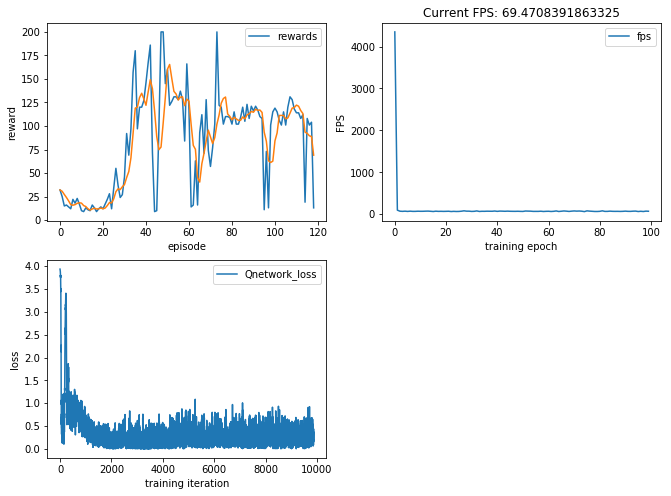

In [45]:
for i in range(100):
    agent.learn(100)
    plot_durations(agent, 5)    

plt.show()

In [46]:
store_res("Categorical DQN", agent)

# Categorical Backwards

In [47]:
config = {
    "env": env,
    "Qnetwork_FeatureExtractor": CartpoleNN,
    "QnetworkHead": CategoricalQnetwork,
    "batch_size": 32,
    "gamma": 0.99,
    "replay_buffer_init": 128,
    "replay_buffer_games_capacity": 50,
    "epsilon_start": 1, "epsilon_final": 0.01, "epsilon_decay": 500,
    "Vmin": -10, "Vmax": 10, "num_atoms": 51
}

In [48]:
agent = eGreedy(CategoricalQAgent(BackwardBufferAgent))(config)

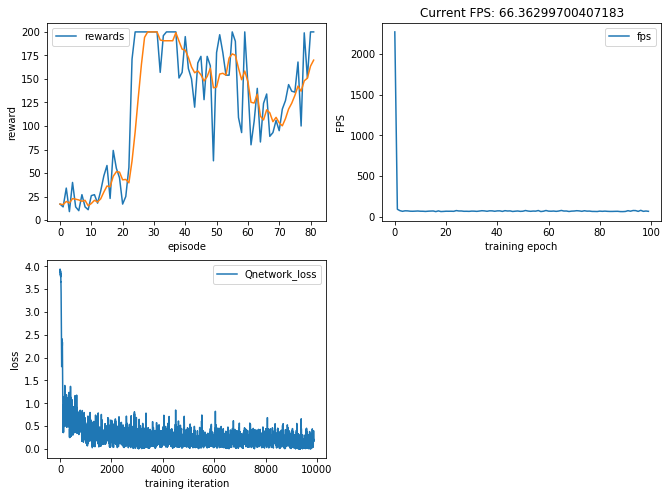

In [49]:
for i in range(100):
    agent.learn(100)
    plot_durations(agent, 5)    

plt.show()

In [50]:
store_res("Categorical Backwards DQN", agent)

# Categorical + Target

In [51]:
config = {
    "env": env,
    "Qnetwork_FeatureExtractor": CartpoleNN,
    "QnetworkHead": CategoricalQnetwork,
    "batch_size": 32,
    "gamma": 0.99,
    "target_update": 100,
    "replay_buffer_init": 128,
    "replay_buffer_capacity": 1000,
    "epsilon_start": 1, "epsilon_final": 0.01, "epsilon_decay": 500,
    "Vmin": -10, "Vmax": 10, "num_atoms": 51
}

In [52]:
agent = eGreedy(TargetQAgent(CategoricalQAgent(ReplayBufferAgent)))(config)

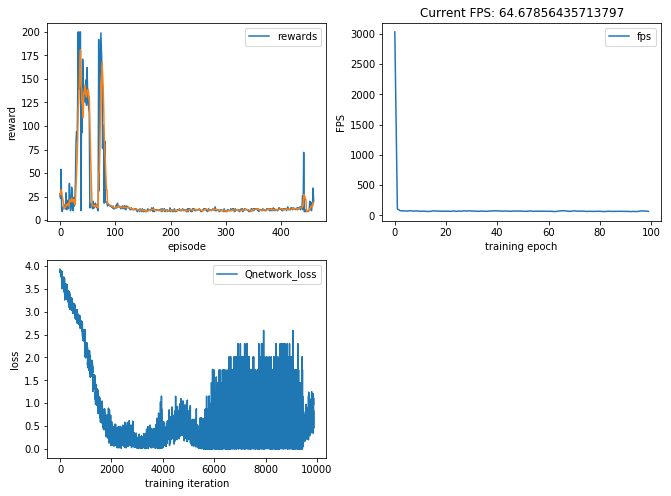

In [53]:
for i in range(100):
    agent.learn(100)
    plot_durations(agent, 5)    

plt.show()

In [54]:
store_res("Categorical DQN with target-net", agent)

# Categorical + Double

In [55]:
config = {
    "env": env,
    "Qnetwork_FeatureExtractor": CartpoleNN,
    "QnetworkHead": CategoricalQnetwork,
    "batch_size": 32,
    "gamma": 0.99,
    "target_update": 100,
    "replay_buffer_init": 128,
    "replay_buffer_capacity": 1000,
    "epsilon_start": 1, "epsilon_final": 0.01, "epsilon_decay": 500,
    "Vmin": -10, "Vmax": 10, "num_atoms": 51
}

In [56]:
agent = eGreedy(DoubleQAgent(CategoricalQAgent(ReplayBufferAgent)))(config)

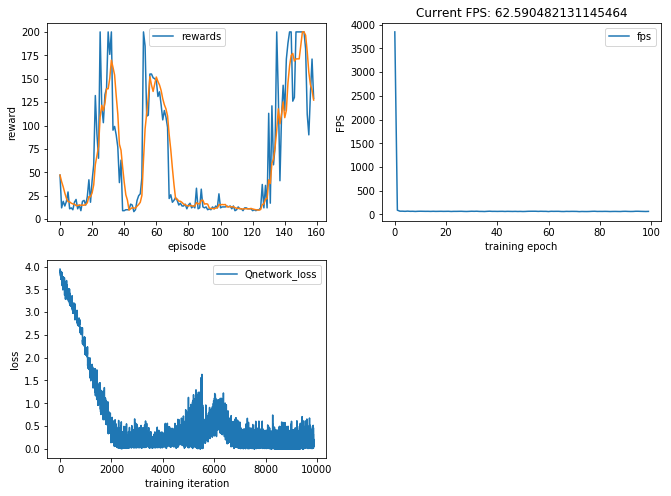

In [57]:
for i in range(100):
    agent.learn(100)
    plot_durations(agent, 5)    

plt.show()

In [58]:
store_res("Categorical Double DQN", agent)

# Categorical + Double + PrioritizedReplayBuffer

In [59]:
config = {
    "env": env,
    "Qnetwork_FeatureExtractor": CartpoleNN,
    "QnetworkHead": CategoricalQnetwork,
    "batch_size": 32,
    "gamma": 0.99,
    "target_update": 100,
    "replay_buffer_init": 128,
    "replay_buffer_capacity": 1000,
    "epsilon_start": 1, "epsilon_final": 0.01, "epsilon_decay": 500,    
    "rp_alpha": 0.6, "rp_beta_start": 0.4, "rp_beta_frames": 1000,
    "Vmin": -10, "Vmax": 10, "num_atoms": 51
}

In [60]:
agent = eGreedy(DoubleQAgent(CategoricalQAgent(PrioritizedBufferAgent)))(config)

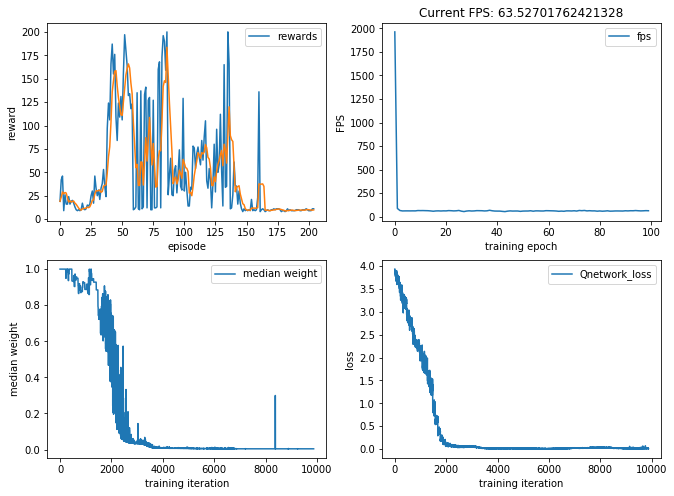

In [61]:
for i in range(100):
    agent.learn(100)
    plot_durations(agent, 5)    

plt.show()

In [62]:
store_res("Categorical Prioritized Double DQN", agent)

# Categorical + Double + PrioritizedReplayBuffer + Noisy

In [63]:
config = {
    "env": env,
    "Qnetwork_FeatureExtractor": CartpoleNN,
    "QnetworkHead": CategoricalQnetwork,
    "Qnetwork_linear": NoisyLinear(),
    "batch_size": 32,
    "gamma": 0.99,
    "target_update": 100,
    "replay_buffer_init": 128,
    "replay_buffer_capacity": 1000,
    "rp_alpha": 0.6, "rp_beta_start": 0.4, "rp_beta_frames": 1000,
    "Vmin": -10, "Vmax": 10, "num_atoms": 51
}

In [64]:
agent = DoubleQAgent(CategoricalQAgent(PrioritizedBufferAgent))(config)

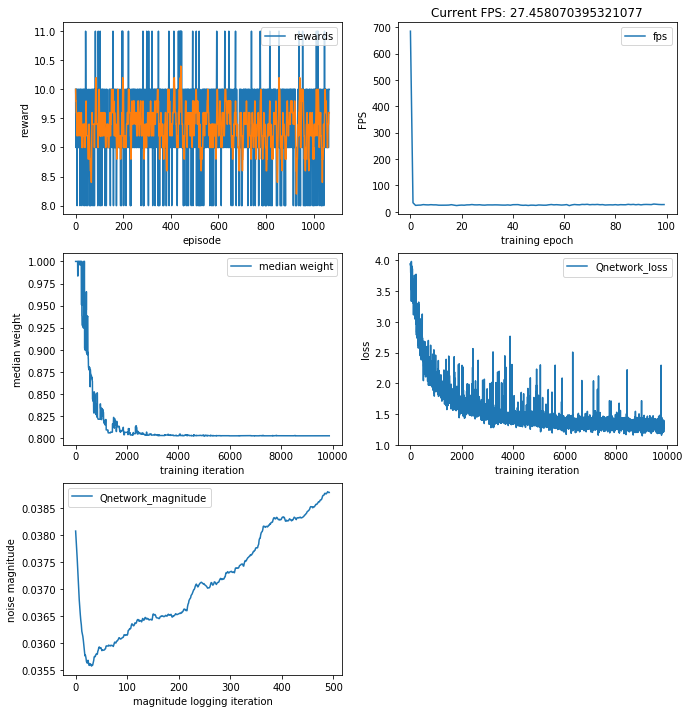

In [65]:
for i in range(100):
    agent.learn(100)
    plot_durations(agent, 5)    

plt.show()

In [66]:
store_res("Noisy Categorical Prioritized Double DQN", agent)

# Categorical + Double + PrioritizedReplayBuffer + Noisy + Dueling

In [67]:
config = {
    "env": env,
    "Qnetwork_FeatureExtractor": CartpoleNN,
    "QnetworkHead": DuelingCategoricalQnetwork,
    "Qnetwork_linear": NoisyLinear(),
    "batch_size": 32,
    "gamma": 0.99,
    "target_update": 100,
    "replay_buffer_init": 128,
    "replay_buffer_capacity": 1000,
    "rp_alpha": 0.6, "rp_beta_start": 0.4, "rp_beta_frames": 1000,
    "Vmin": -10, "Vmax": 10, "num_atoms": 51
}

In [68]:
agent = DoubleQAgent(CategoricalQAgent(PrioritizedBufferAgent))(config)

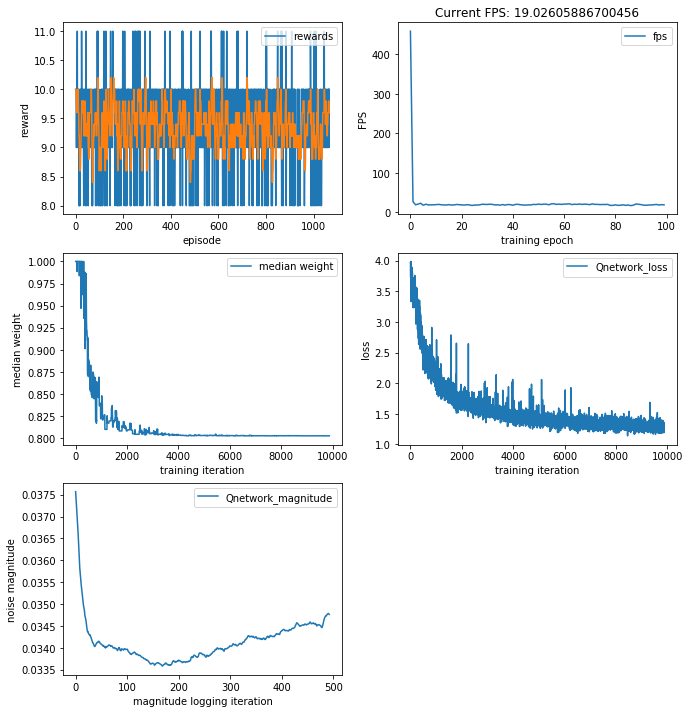

In [69]:
for i in range(100):
    agent.learn(100)
    plot_durations(agent, 5)    

plt.show()

In [70]:
store_res("Noisy Categorical Prioritized Dueling Double DQN", agent)

# Rainbow

In [71]:
config = {
    "env": env,
    "Qnetwork_FeatureExtractor": CartpoleNN,
    "QnetworkHead": DuelingCategoricalQnetwork,
    "Qnetwork_linear": NoisyLinear(),
    "batch_size": 32,
    "gamma": 0.99,
    "target_update": 100,
    "replay_buffer_nsteps": 2,
    "replay_buffer_init": 128,
    "replay_buffer_capacity": 1000,
    "rp_alpha": 0.6, "rp_beta_start": 0.4, "rp_beta_frames": 1000,
    "Vmin": -10, "Vmax": 10, "num_atoms": 51
}

In [72]:
agent = DoubleQAgent(CategoricalQAgent(NstepReplay(PrioritizedBufferAgent)))(config)

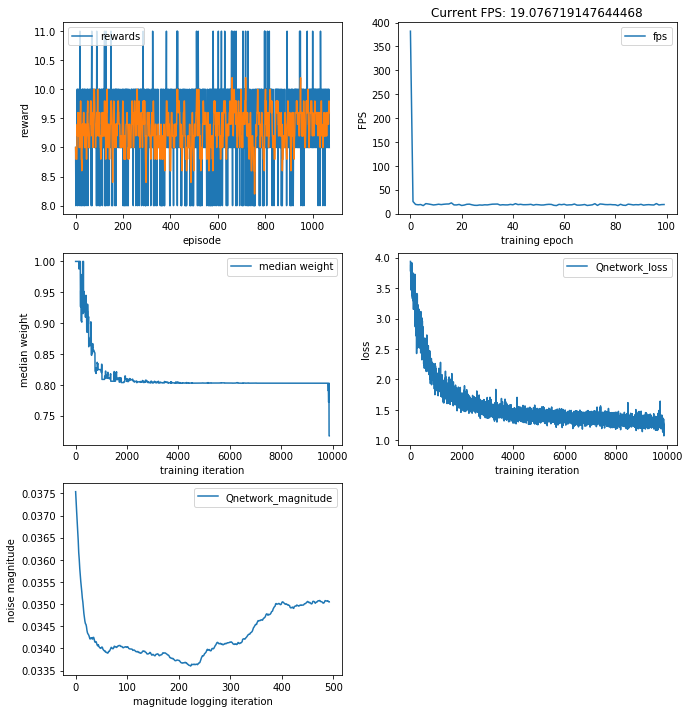

In [73]:
for i in range(100):
    agent.learn(100)
    plot_durations(agent, 5)    

plt.show()

In [74]:
store_res("Rainbow", agent)

# QR-DQN

In [75]:
config = {
    "env": env,
    "Qnetwork_FeatureExtractor": CartpoleNN,
    "batch_size": 32,
    "gamma": 0.99,
    "replay_buffer_init": 128,
    "replay_buffer_capacity": 1000,
    "epsilon_start": 1, "epsilon_final": 0.01, "epsilon_decay": 500,
    "quantiles": 51
}

In [76]:
agent = eGreedy(DoubleQAgent(QuantileQAgent(ReplayBufferAgent)))(config)

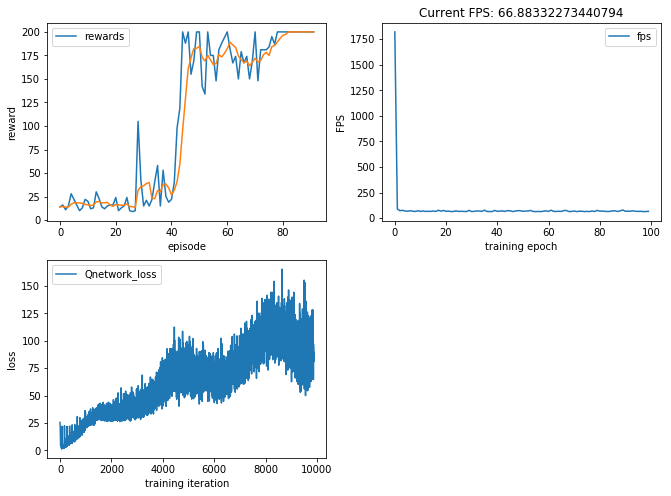

In [77]:
for i in range(100):
    agent.learn(100)
    plot_durations(agent, 5)    

plt.show()

In [78]:
store_res("Quantile DQN", agent)

# RESULTS

In [79]:
results

,Reached 200,Average reward,FPS
DQN,42.0,100.561226,91.513890
TwinDQN,51.0,84.758621,48.749623
Backwards DQN,34.0,128.220779,89.696942
Double DQN,35.0,110.247192,81.380850
Dueling Double DQN,37.0,113.839081,56.482023
Prioritized Double DQN,59.0,90.596329,81.546677
Noisy Double DQN,NaN,9.380863,29.454592
Noisy Prioritized Double DQN,NaN,9.344860,29.765728
Noisy Prioritized Dueling Double DQN,NaN,9.347054,21.478348
Categorical DQN,47.0,83.873947,68.563387


In [84]:
results  # old

,Reached 200,Average reward,FPS
Backward DQN,50.0,103.589470,102.609290
Pure backward DQN,58.0,102.822914,110.712171
DQN,45.0,101.958763,102.549885
Double DQN,30.0,105.147369,100.637534
Dueling Double DQN,34.0,120.256096,70.079083
Prioritized Double DQN,62.0,89.720718,99.884073
Noisy Double DQN,NaN,9.333333,43.103519
Noisy Prioritized Double DQN,132.0,55.297752,41.839491
Noisy Prioritized Dueling Double DQN,NaN,9.365511,30.855807
Categorical DQN,33.0,82.791664,79.121614


In [63]:
results  # very old one

,Reached 200,Average reward,Wall clock per frame
DQN,27.0,137.90,0.018564
Double DQN,43.0,106.61,0.020188
Dueling Double DQN,41.0,146.64,0.026545
Prioritized Double DQN,58.0,90.70,0.019881
Noisy Double DQN,66.0,58.17,0.047890
Noisy Prioritized Double DQN,NaN,14.32,0.066598
Noisy Prioritized Dueling Double DQN,NaN,9.49,0.089293
Categorical DQN,23.0,123.14,0.023840
Categorical DQN with target-net,40.0,83.57,0.024900
Categorical Double DQN,28.0,76.55,0.026123


In [64]:
env.close()